In [1]:
from math import ceil

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, plot_confusion_matrix, precision_score, recall_score

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
# Load penguin dataset
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
print(penguins.shape)
penguins.head()

(333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


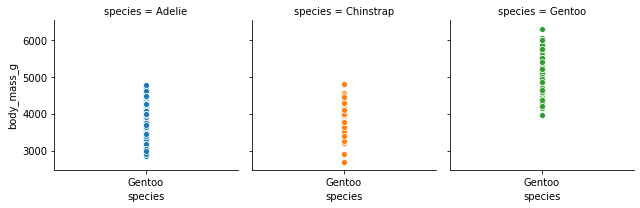

In [7]:
# Plot species
g = sns.FacetGrid(penguins, col='species', hue='species')
g.map(sns.scatterplot, 'species', 'body_mass_g')

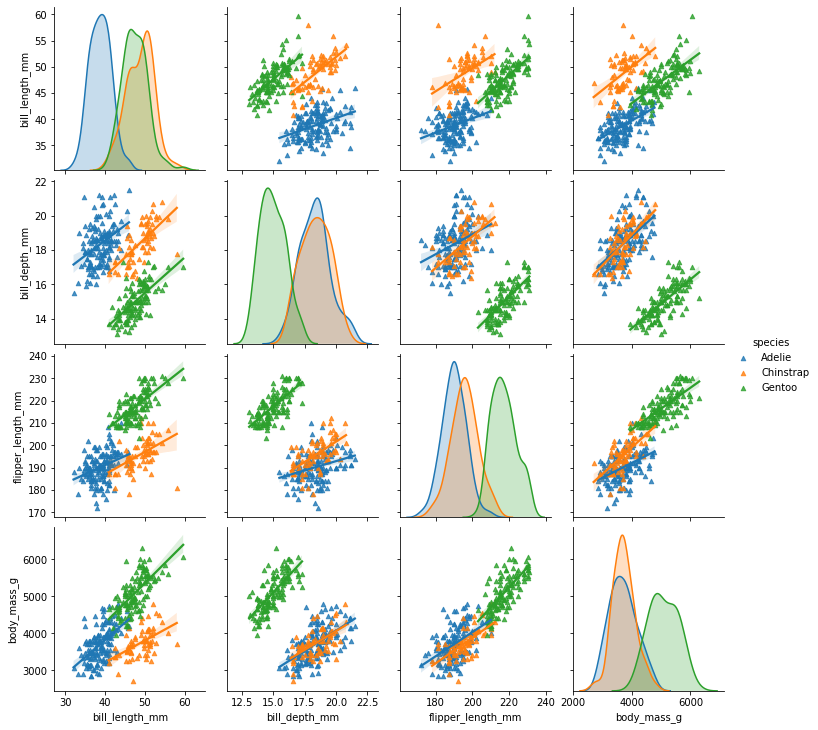

In [8]:
# Plot features
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
sns.pairplot(penguins, 
             vars=features, 
             hue='species', 
             kind='reg', 
             markers='^',
             plot_kws=dict(scatter_kws=dict(s=20))
            )

In [9]:
# Split X, y, train data, test data
X = penguins[features]
y = penguins.species
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [10]:
# Function to analyse a given model
def analyze_model(name, model): 
    m = model
    m.fit(Xtrain, ytrain)

    # Model accuracy
    train_acc = m.score(Xtrain, ytrain)
    test_acc = m.score(Xtest, ytest)
    cross_val = cross_val_score(m, Xtrain, ytrain)
    cross_val_formatted = ['%0.3f' % score for score in cross_val_score(m, Xtrain, ytrain)]
    cross_val_average = sum(cross_val) / len(cross_val)
    
    
    # Prediction
    ypred = m.predict(Xtest)
    
    # Prediction scores
    precision = precision_score(ytest.values, ypred, average="micro")
    recall = recall_score(ytest.values, ypred, average="micro")
    f1 = f1_score(ytest.values, ypred, average="micro")
    
    # plot_confusion_matrix(m, Xtest, ytest)
    
    print(f'{name} done')
    
    return name, {
            'Train accuracy': train_acc, 
            'Test accuracy': test_acc, 
            'Precision score': precision, 
            'Recall score': recall, 
            'F1 score': f1, 
            'Cross validation scores': cross_val_formatted,
            'Cross val average': cross_val_average
           }

In [11]:
# Models to be included
baseline = [
          ('Baseline model', DummyClassifier(strategy='most_frequent'))
]

models = [
          ('Support Vector Machines', SVC()),
          ('K Neighbors', KNeighborsClassifier()),
          ('Naive Bayes', GaussianNB()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),  
          ('Logistic Regression', LogisticRegression(multi_class="multinomial", class_weight="balanced", max_iter=3000)),
]

ensemble = [
          ('Ensemble of all models', VotingClassifier(models))
]

all_models = baseline + models + ensemble

In [12]:
# Analyze models
results = []

for model in all_models: 
    res = analyze_model(model[0], model[1])
    results.append(res)

Baseline model done
Support Vector Machines done
K Neighbors done
Naive Bayes done
Decision Tree done
Random Forest done
Logistic Regression done
Ensemble of all models done


In [13]:
# Prepare for table presentation
headers = [key for key in results[0][1].keys()]
rows = [list(val) for val in (result[1].values() for result in results)]
model_names = [result[0] for result in results]
cols = 5
start = 0
end = cols
iterations = ceil(len(headers) / cols)

In [14]:
# Show results in table
for i in range(iterations):
    print()
    print(tabulate([row[start:end] for row in rows], 
                   headers=headers[start:end],
                   showindex=model_names,
                   tablefmt='github', 
                   floatfmt='.3f'))
    print()
    start = end
    end = end + cols


|                         |   Train accuracy |   Test accuracy |   Precision score |   Recall score |   F1 score |
|-------------------------|------------------|-----------------|-------------------|----------------|------------|
| Baseline model          |            0.446 |           0.417 |             0.417 |          0.417 |      0.417 |
| Support Vector Machines |            0.755 |           0.643 |             0.643 |          0.643 |      0.643 |
| K Neighbors             |            0.819 |           0.702 |             0.702 |          0.702 |      0.702 |
| Naive Bayes             |            0.972 |           0.940 |             0.940 |          0.940 |      0.940 |
| Decision Tree           |            1.000 |           0.940 |             0.940 |          0.940 |      0.940 |
| Random Forest           |            1.000 |           0.976 |             0.976 |          0.976 |      0.976 |
| Logistic Regression     |            0.996 |           1.000 |             1.